## Car Price Predictions

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt 
from xgboost import XGBRegressor
from sklearn.impute import SimpleImputer
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor, ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor, VotingRegressor, StackingRegressor
import lightgbm as lgb

In [3]:
df = pd.read_csv('car_data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [5]:
df.shape

(301, 9)

In [6]:
df['Number_of_Years'] = 2025 - df['Year']

In [7]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Number_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,11
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,12
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,8
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,14
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,11


In [8]:
print(df['Fuel_Type'].unique()) 
print(df['Seller_Type'].unique()) 
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [9]:
final_dataset = df.drop(columns=['Year', 'Car_Name'], axis=1)

In [10]:
final_dataset = pd.get_dummies(final_dataset, dtype='int')

In [11]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,11,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,12,0,1,0,1,0,0,1


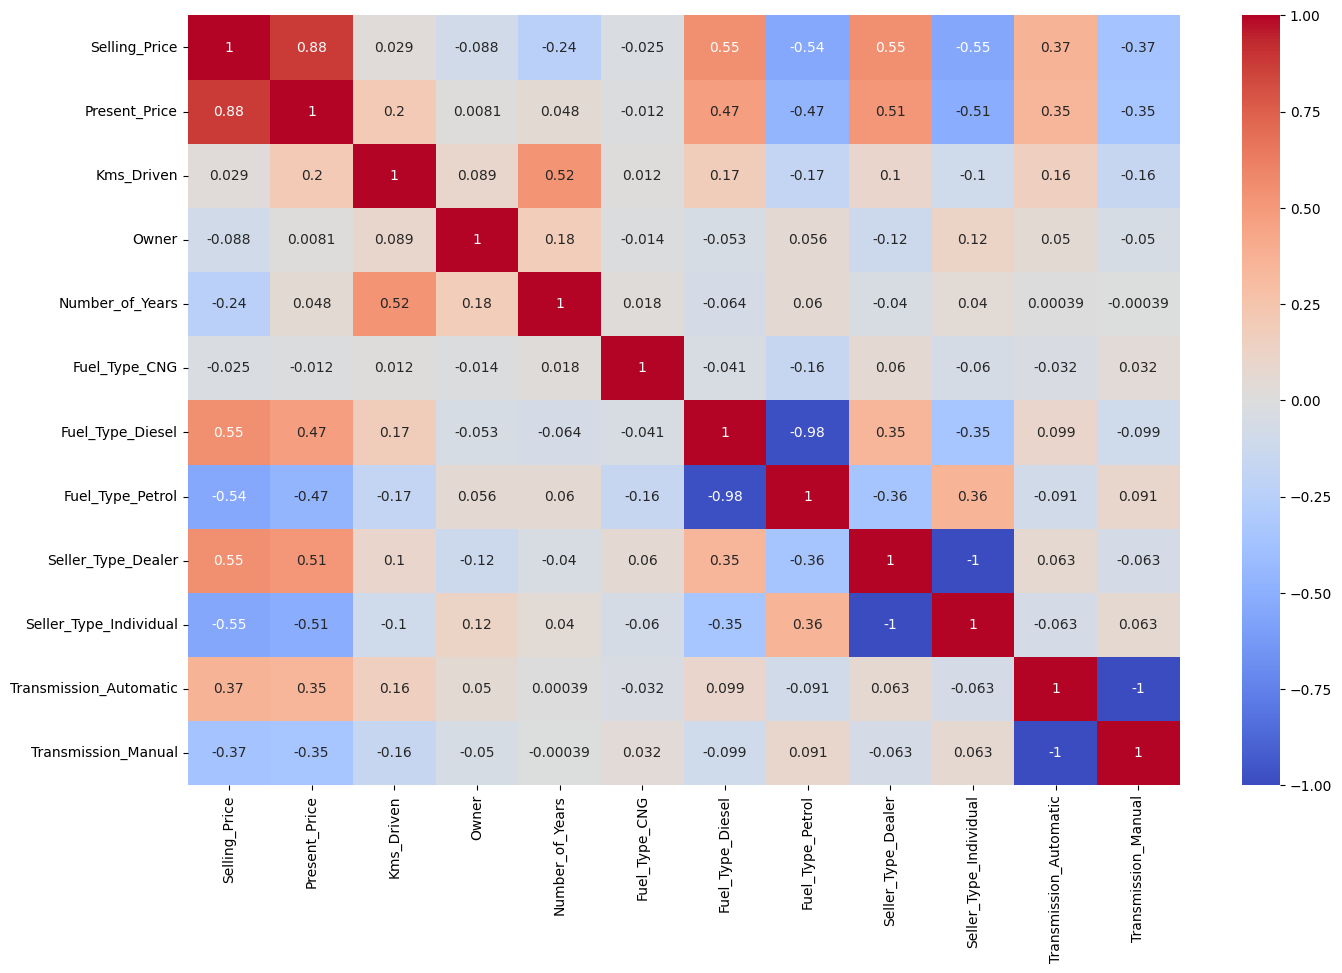

In [12]:
corrmat = final_dataset.corr() 
top_corr_features = corrmat.index
plt.figure(figsize = (16,10)) #plot heat map 
g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True, cmap = "coolwarm") # RdYlGn
plt.show()

In [15]:
final_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Owner,Number_of_Years,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,11,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,12,0,1,0,1,0,0,1


In [16]:
X = final_dataset.iloc[:, 1:]
y = final_dataset.iloc[:, 0]

In [17]:
# Model 
model = ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [18]:
print(model.feature_importances_)

[3.94828198e-01 3.86249425e-02 1.37672710e-03 7.79351496e-02
 8.54994567e-05 2.15276792e-01 8.06185060e-03 1.36923443e-01
 1.40143090e-03 5.33328006e-02 7.21531666e-02]


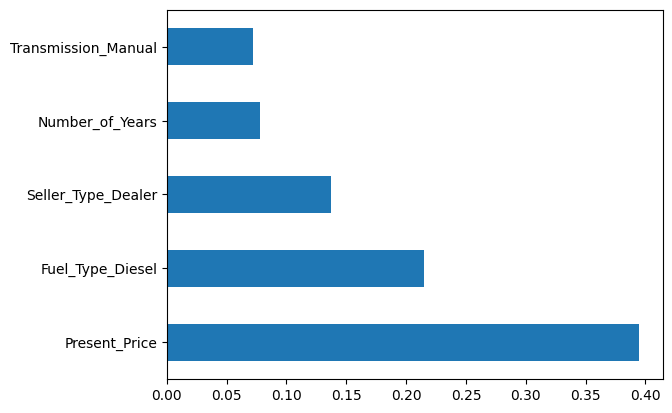

In [19]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Hidden work

In [ ]:
Valid parameters are: ['cv', 'error_score', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 
                       'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'].

In [33]:
# RandomForest parameter grid
param_grid = {
    #'n_estimators': ['cv', 'error_score', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 
                    # 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'],  # Fewer points, broader range
    'max_features': ['sqrt', 'log2'],  # Removed None as it often leads to overfitting
    'max_depth': [10, 15, 20, 30, None],  # Added None back but with fewer steps
    'min_samples_split': [2, 5, 10, 20],  # More balanced progression
    'min_samples_leaf': [1, 2, 4, 8]      # Geometric progression
}

In [21]:
# RandomForest parameter grid
param_grid = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=1200, num=12)],
    'max_features': ['sqrt', 'log2', None],  # None uses all features
    'max_depth': [int(x) for x in np.linspace(5, 30, num=6)], # + [None],  # None means unlimited
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [22]:
# Set up RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator= RandomForestClassifier(),  # or RandomForestRegressor()
    param_distributions= param_grid, scoring='neg_mean_squared_error', 
    n_iter= 10,  # Number of parameter settings sampled
    cv=5, # 5-fold cross-validation
    verbose=2, random_state=42, n_jobs= 1)   # Use all available cores

In [25]:
rd_forest = RandomizedSearchCV(estimator= rf_random, param_distributions= param_grid,
                               scoring='neg_mean_squared_error', n_iter= 10, cv= 5,
                               verbose= 2, random_state= 42, n_jobs= 1)

### Random Forest

In [29]:
# Fit the randomized search
random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
rf_pred = random_forest.predict(X_test)

In [30]:
random_forest.score(X_test, y_test)

0.9558836458497952

In [31]:
n_estimators = [int(x) for x in np.linspace(start= 100, stop= 1200, num= 12)]
max_features = ['sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 30, num= 6)]
min_samples_split = [2, 5, 10, 15, 100] 
min_samples_leaf= [1, 2, 5, 10]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features, 
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split, 
               'min_samples_leaf': min_samples_leaf}

In [32]:
rd_forest = RandomForestRegressor()

In [33]:
rd_forest = RandomizedSearchCV(estimator= rd_forest, param_distributions= random_grid,
                               scoring='neg_mean_squared_error', n_iter= 10, cv= 5,
                               verbose= 2, random_state= 42, n_jobs= 1)

In [34]:
rd_forest.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.6s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.9s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [35]:
prediction = rd_forest.predict(X_test)

In [36]:
prediction

array([ 0.53114   , 10.02891   ,  5.31424   ,  0.24308   ,  6.87156   ,
        6.39735   ,  1.00142   ,  0.59657   ,  0.48886   ,  6.2144    ,
        9.81715   ,  0.92304   ,  7.83504   ,  0.55596   ,  5.3883    ,
        3.01551   ,  0.99327   , 11.04087   ,  0.58848   ,  1.46727   ,
        0.49666   ,  8.59589   ,  5.81903   ,  2.7437    ,  0.52263   ,
        3.50528   ,  5.22335   ,  3.11015   ,  1.19529   ,  1.09399   ,
        0.62886   ,  9.43637   ,  0.43297   ,  2.65365   ,  7.98347   ,
        4.10367167,  6.18433   ,  5.05599   ,  3.13185   ,  5.48018   ,
        4.20875   ,  4.40445   ,  4.90014167,  0.51568   ,  7.07026   ,
        0.5869    ,  7.17335   ,  6.34171   ,  3.1341    ,  3.64275   ,
        5.56685   ,  1.4082    , 21.07102   , 21.07246   ,  6.81235   ,
        8.70199   ,  5.25954   ,  9.37113   ,  2.63397   ,  7.51865   ,
        0.2853    ])

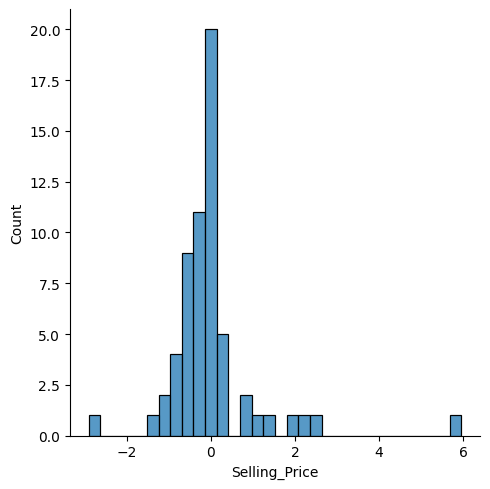

In [38]:
sns.displot(y_test - prediction)
plt.show()

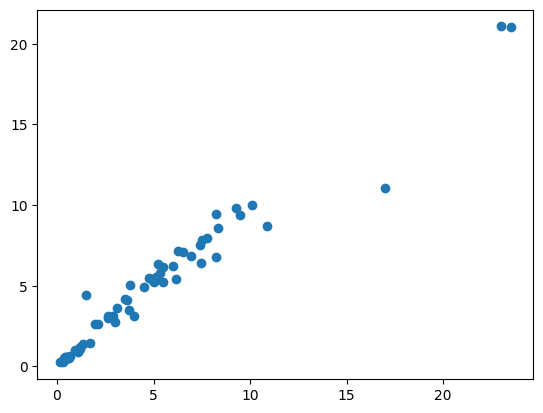

In [39]:
plt.scatter(y_test, prediction)
plt.show()

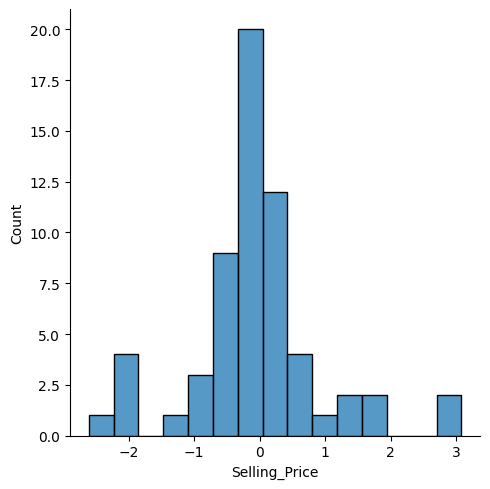

In [40]:
sns.displot(y_test - rf_pred)
plt.show()

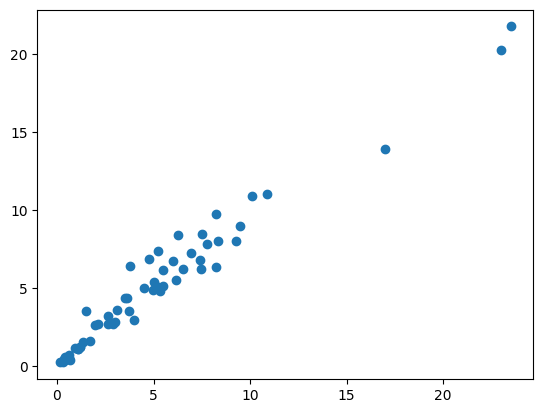

In [41]:
plt.scatter(y_test, rf_pred)
plt.show()

In [37]:
rf_pred

array([ 0.4532, 10.8881,  4.892 ,  0.2152,  7.2445,  6.1865,  1.0789,
        0.5846,  0.4749,  6.703 ,  7.9743,  1.0694,  8.4649,  0.4664,
        5.4845,  2.65  ,  1.148 , 13.9248,  0.481 ,  1.572 ,  0.3499,
        8.0148,  4.767 ,  2.7945,  0.5179,  3.5365,  5.346 ,  3.1745,
        1.2112,  1.1755,  0.4053,  9.708 ,  0.4641,  2.6385,  7.7832,
        4.319 ,  6.1223,  6.4082,  2.6505,  6.8589,  4.3487,  3.4935,
        5.0115,  0.5787,  6.1815,  0.7262,  8.364 ,  7.3855,  2.931 ,
        3.586 ,  5.14  ,  1.504 , 21.7508, 20.2569,  6.333 , 10.9969,
        5.0995,  8.9566,  2.658 ,  6.8058,  0.238 ])

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [43]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 0.5956856284153004
MSE: 1.2006209118793265
RMSE: 1.0957284845614477


In [44]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)